# Using Different emails to build this. The results will be slightly different from the book, but the approach should remain the same.

In [86]:
#get packages
# install.packages('tm')
install.packages('rpart.plot')

Installing package into ‘/home/kyle/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [3]:
# Import data
easy_ham = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham"
hard_ham = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_hard_ham/hard_ham"
easy_ham2 = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20030228_easy_ham_2/easy_ham_2"
spam = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_spam/spam"
spam2 = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20030228_spam_2/spam_2"

dirNames = c(easy_ham, easy_ham2, hard_ham, spam, spam2)



In [2]:
head(list.files(path = easy_ham))

[1] "0001.ea7e79d3153e7469e7a9c3e0af6a357e"
[2] "0002.b3120c4bcbf3101e661161ee7efcb8bf"
[3] "0003.acfc5ad94bbd27118a0d8685d18c89dd"
[4] "0004.e8d5727378ddde5c3be181df593f1712"
[5] "0005.8c3b9e9c0f3f183ddaf7592a11b99957"
[6] "0006.ee8b0dba12856155222be180ba122058"

In [4]:
sapply(dirNames, function(dir) length(list.files(dir)) )

/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham 
                                                                                                                        2551 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20030228_easy_ham_2/easy_ham_2 
                                                                                                                        1401 
    /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_hard_ham/hard_ham 
                                                                                                                         250 
            /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_spam/spam 
                                                                                                                         501 
        /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20030228_spam_2/spam_2 
                                                                                                                        1398

In [5]:
fullDirNames = dirNames

fileNames = list.files(fullDirNames[1], full.names = TRUE)
fileNames[1]

[1] "/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e"

In [6]:
indx = c(1:5, 15, 27, 68, 69, 329, 404, 427, 516, 852, 971)
fn = list.files(fullDirNames[1], full.names = TRUE)[indx]
sampleEmail = sapply(fn, readLines)  

In [7]:
sampleEmail

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e`
  [1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                                                        
  [2] "Return-Path: <exmh-workers-admin@example.com>"                                                                       
  [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                                                         
  [4] "Received: from localhost (localhost [127.0.0.1])"                                                                    
  [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"                                                  
  [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"                                                       
  [7] "Received: from phobos [127.0.0.1]"                                                                                   
  [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                                                          
  [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"                                           
 [10] "Received: from listman.example.com (listman.example.com [66.187.233.211]) by"                                        
 [11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"                                              
 [12] "    <zzzz-exmh@example.com>; Thu, 22 Aug 2002 12:34:53 +0100"                                                        
 [13] "Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by"                                           
 [14] "    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002"                                         
 [15] "    07:35:02 -0400 (EDT)"                                                                                            
 [16] "Delivered-To: exmh-workers@listman.example.com"                                                                      
 [17] "Received: from int-mx1.corp.example.com (int-mx1.corp.example.com"                                                   
 [18] "    [172.16.52.254]) by listman.redhat.com (Postfix) with ESMTP id 10CF8406D7"                                       
 [19] "    for <exmh-workers@listman.redhat.com>; Thu, 22 Aug 2002 07:34:10 -0400"                                          
 [20] "    (EDT)"                                                                                                           
 [21] "Received: (from mail@localhost) by int-mx1.corp.example.com (8.11.6/8.11.6)"                                         
 [22] "    id g7MBY7g11259 for exmh-workers@listman.redhat.com; Thu, 22 Aug 2002"                                           
 [23] "    07:34:07 -0400"                                                                                                  
 [24] "Received: from mx1.example.com (mx1.example.com [172.16.48.31]) by"                                                  
 [25] "    int-mx1.corp.redhat.com (8.11.6/8.11.6) with SMTP id g7MBY7Y11255 for"                                           
 [26] "    <exmh-workers@redhat.com>; Thu, 22 Aug 2002 07:34:07 -0400"                                                      
 [27] "Received: from ratree.psu.ac.th ([202.28.97.6]) by mx1.example.com"                                                  
 [28] "    (8.11.6/8.11.6) with SMTP id g7MBIhl25223 for <exmh-workers@redhat.com>;"                                        
 [29] "    Thu, 22 Aug 2002 07:18:55 -0400"                                                                                 
 [30] "Received: from delta.cs.mu.OZ.AU (delta.coe.psu.ac.th [172.30.0.98]) by"                                             
 [31] "    ratree.psu.ac.th (8.11.6/8.11.6) with ESMTP id g7MBWel29762;"                

In [9]:
msg = sampleEmail[[1]]
which(msg == "")[1]


[1] 63

In [10]:
match("", msg)

splitPoint = match("", msg)

msg[ (splitPoint - 2):(splitPoint + 6) ]

[1] 63

[1] "List-Archive: <https://listman.example.com/mailman/private/exmh-workers/>"  
[2] "Date: Thu, 22 Aug 2002 18:26:25 +0700"                                      
[3] ""                                                                           
[4] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                           
[5] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"
[6] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                
[7] ""                                                                           
[8] ""                                                                           
[9] "  | I can't reproduce this error."

In [26]:
splitPoint

[1] 63

In [ ]:
# return(tryCatch(as.Date(date_in), error=function(e) NULL))

In [34]:
header = msg[1:(splitPoint-1)]
body = msg[ -(1:splitPoint) ]

splitMessage = function(msg) {
    return(tryCatch({
  splitPoint = match("", msg)
  header = msg[1:(splitPoint-1)]
  body = msg[ -(1:splitPoint) ]
  return(list(header = header, body = body))}, error=function(e) NULL))
    
}

sampleSplit = lapply(sampleEmail, splitMessage)
sampleSplit

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e`
$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e`$header
 [1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                  
 [2] "Return-Path: <exmh-workers-admin@example.com>"                                 
 [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                   
 [4] "Received: from localhost (localhost [127.0.0.1])"                              
 [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"            
 [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"                 
 [7] "Received: from phobos [127.0.0.1]"                                             
 [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                    
 [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"     
[10] "Received: from listman.example.com (listman.example.com [66.187.233.211]) by"  
[11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"        
[12] "    <zzzz-exmh@example.com>; Thu, 22 Aug 2002 12:34:53 +0100"                  
[13] "Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by"     
[14] "    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002"   
[15] "    07:35:02 -0400 (EDT)"                                                      
[16] "Delivered-To: exmh-workers@listman.example.com"                                
[17] "Received: from int-mx1.corp.example.com (int-mx1.corp.example.com"             
[18] "    [172.16.52.254]) by listman.redhat.com (Postfix) with ESMTP id 10CF8406D7" 
[19] "    for <exmh-workers@listman.redhat.com>; Thu, 22 Aug 2002 07:34:10 -0400"    
[20] "    (EDT)"                                                                     
[21] "Received: (from mail@localhost) by int-mx1.corp.example.com (8.11.6/8.11.6)"   
[22] "    id g7MBY7g11259 for exmh-workers@listman.redhat.com; Thu, 22 Aug 2002"     
[23] "    07:34:07 -0400"                                                            
[24] "Received: from mx1.example.com (mx1.example.com [172.16.48.31]) by"            
[25] "    int-mx1.corp.redhat.com (8.11.6/8.11.6) with SMTP id g7MBY7Y11255 for"     
[26] "    <exmh-workers@redhat.com>; Thu, 22 Aug 2002 07:34:07 -0400"                
[27] "Received: from ratree.psu.ac.th ([202.28.97.6]) by mx1.example.com"            
[28] "    (8.11.6/8.11.6) with SMTP id g7MBIhl25223 for <exmh-workers@redhat.com>;"  
[29] "    Thu, 22 Aug 2002 07:18:55 -0400"                                           
[30] "Received: from delta.cs.mu.OZ.AU (delta.coe.psu.ac.th [172.30.0.98]) by"       
[31] "    ratree.psu.ac.th (8.11.6/8.11.6) with ESMTP id g7MBWel29762;"              
[32] "    Thu, 22 Aug 2002 18:32:40 +0700 (ICT)"                                     
[33] "Received: from munnari.OZ.AU (localhost [127.0.0.1]) by delta.cs.mu.OZ.AU"     
[34] "    (8.11.6/8.11.6) with ESMTP id g7MBQPW13260; Thu, 22 Aug 2002 18:26:25"     
[35] "    +0700 (ICT)"                                                               
[36] "From: Robert Elz <kre@munnari.OZ.AU>"                                          
[37] "To: Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"                
[38] "Cc: exmh-workers@example.com"                                                  
[39] "Subject: Re: New Sequences Window"                                             
[40] "In-Reply-To: <1029945287.4797.TMDA@deepeddy.vircio.com>"                       
[41] "References: <1029945287.4797.TMDA@deepeddy.vircio.com>"                        
[42] "    <1029882468.3116.TMDA@deepeddy.vircio.com> <9627.1029933001@munnari.OZ.AU>"
[43] "    <1029943066.26919.TMDA@deepeddy.vircio.com>"   

In [12]:
header = sampleSplit[[1]]$header
grep("Content-Type", header)

grep("multi", tolower(header[46]))

header[46]

headerList = lapply(sampleSplit, function(msg) msg$header)
CTloc = sapply(headerList, grep, pattern = "Content-Type")
CTloc

sapply(headerList, function(header) {
                       CTloc = grep("Content-Type", header)
                       if (length(CTloc) == 0) return(NA)
                       CTloc
                   })

hasAttach = sapply(headerList, function(header) {
  CTloc = grep("Content-Type", header)
  if (length(CTloc) == 0) return(FALSE)
  grepl("multi", tolower(header[CTloc])) 
})

hasAttach

[1] 46

integer(0)

[1] "Content-Type: text/plain; charset=us-ascii"

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e`
[1] 46

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0002.b3120c4bcbf3101e661161ee7efcb8bf`
[1] 45

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0003.acfc5ad94bbd27118a0d8685d18c89dd`
[1] 42

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0004.e8d5727378ddde5c3be181df593f1712`
[1] 30

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0005.8c3b9e9c0f3f183ddaf7592a11b99957`
integer(0)

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0015.a9ff8d7550759f6ab62cc200bdf156e7`
[1] 33

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0027.11da06d9130a188bf0ffb2060881dbe9`
[1] 35

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0068.f1c604a78739e4f966253d762c972dde`
integer(0)

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0069.7173de1d2da14306c5a20e8abda7a6e2`
[1] 32

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0329.0479ba224116953d0c94c30edbc91b55`
[1] 27

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0404.eceb4a64a9ef4c1d738782efde23c09b`
[1] 35

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0427.0a5cdbfdb46be2bfac7cff1cae89dc25`
[1] 29

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0516.3b4b9b147de3e2b7ee1ca08792a9d948`
[1] 27

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0852.cab2623799815a32681d15c6c82a41c5`
[1] 28

$`/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0971.0442a60e9294a07934b67f751cb1177e`
[1] 31

/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e 
                                                                                                                                                            46 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0002.b3120c4bcbf3101e661161ee7efcb8bf 
                                                                                                                                                            45 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0003.acfc5ad94bbd27118a0d8685d18c89dd 
                                                                                                                                                            42 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0004.e8d5727378ddde5c3be181df593f1712 
                                                                                                                                                            30 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0005.8c3b9e9c0f3f183ddaf7592a11b99957 
                                                                                                                                                            NA 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0015.a9ff8d7550759f6ab62cc200bdf156e7 
                                                                                                                                                            33 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0027.11da06d9130a188bf0ffb2060881dbe9 
                                                                                                                                                            35 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0068.f1c604a78739e4f966253d762c972dde 
                                                                                                                                                            NA 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0069.7173de1d2da14306c5a20e8abda7a6e2 
                                                                                                                                                            32 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0329.0479ba224116953d0c94c30edbc91b55 
                                                                                                                                                            27 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0404.eceb4a64a9ef4c1d738782efde23c09b 
                                                                                                                                                            35 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0427.0a5cdbfdb46be2bfac7cff1cae89dc25 
                                                                                                                                                            29 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0516.3b4b9b147de3e2b7ee1ca08792a9d948 


/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0002.b3120c4bcbf3101e661161ee7efcb8bf 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0003.acfc5ad94bbd27118a0d8685d18c89dd 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0004.e8d5727378ddde5c3be181df593f1712 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0005.8c3b9e9c0f3f183ddaf7592a11b99957 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0015.a9ff8d7550759f6ab62cc200bdf156e7 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0027.11da06d9130a188bf0ffb2060881dbe9 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0068.f1c604a78739e4f966253d762c972dde 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0069.7173de1d2da14306c5a20e8abda7a6e2 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0329.0479ba224116953d0c94c30edbc91b55 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0404.eceb4a64a9ef4c1d738782efde23c09b 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0427.0a5cdbfdb46be2bfac7cff1cae89dc25 
                                                                                                                                                         FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham/0516.3b4b9b147de3e2b7ee1ca08792a9d948 


In [13]:
header = sampleSplit[[6]]$header
boundaryIdx = grep("boundary=", header)
header[boundaryIdx]

character(0)

In [14]:
sub(".*boundary=\"(.*)\";.*", "\\1", header[boundaryIdx])


character(0)

In [15]:
header = sampleSplit[[6]]$header
boundaryIdx = grep("boundary=", header)
header[boundaryIdx]

sub(".*boundary=\"(.*)\";.*", "\\1", header[boundaryIdx])

header2 = headerList[[9]]
boundaryIdx2 = grep("boundary=", header2)
header2[boundaryIdx2]

sub('.*boundary="(.*)";.*', "\\1", header2[boundaryIdx2])

boundary2 = gsub('"', "", header2[boundaryIdx2])

sub(".*boundary= *(.*);?.*", "\\1", boundary2)

boundary = gsub('"', "", header[boundaryIdx])
sub(".*boundary= *(.*);?.*", "\\1", boundary)

sub(".*boundary= *([^;]*);?.*", "\\1", boundary)

getBoundary = function(header) {
  boundaryIdx = grep("boundary=", header)
  boundary = gsub('"', "", header[boundaryIdx])
  gsub(".*boundary= *([^;]*);?.*", "\\1", boundary)
}

sampleSplit[[6]]$body

boundary = getBoundary(headerList[[15]]) 
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

msg = body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)]
tail(msg)

msg = c(msg, body[ (eStringLoc + 1) : length(body) ])
tail(msg)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "I don't know how make of you are in the Bay Area but EFF is having a benifit "  
 [2] "party ast the DNA Lounge in San Francisco tonight. Wil Weaton (Wesley Crussher "
 [3] "from star Trek TNG) will fight Barney the Dinasour."                            
 [4] ""                                                                               
 [5] "Come on by if you're not doing anything."                                       
 [6] ""                                                                               
 [7] ""                                                                               
 [8] ""                                                                               
 [9] "-------------------------------------------------------"                        
[10] "This sf.net email is sponsored by: OSDN - Tired of that same old"               
[11] "cell phone?  Get a new here for FREE!"                                          
[12] "https://www.inphonic.com/r.asp?r=sourceforge1&refcode1=vs3390"                  
[13] "_______________________________________________"                                
[14] "Spamassassin-devel mailing list"                                                
[15] "Spamassassin-devel@lists.sourceforge.net"                                       
[16] "https://lists.sourceforge.net/lists/listinfo/spamassassin-devel"                
[17] ""

integer(0)

integer(0)

ERROR: Error in (bStringLocs[1] + 1):(bStringLocs[2] - 1): NA/NaN argument


In [16]:
msg

[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                                                        
  [2] "Return-Path: <exmh-workers-admin@example.com>"                                                                       
  [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                                                         
  [4] "Received: from localhost (localhost [127.0.0.1])"                                                                    
  [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"                                                  
  [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"                                                       
  [7] "Received: from phobos [127.0.0.1]"                                                                                   
  [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                                                          
  [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"                                           
 [10] "Received: from listman.example.com (listman.example.com [66.187.233.211]) by"                                        
 [11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"                                              
 [12] "    <zzzz-exmh@example.com>; Thu, 22 Aug 2002 12:34:53 +0100"                                                        
 [13] "Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by"                                           
 [14] "    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002"                                         
 [15] "    07:35:02 -0400 (EDT)"                                                                                            
 [16] "Delivered-To: exmh-workers@listman.example.com"                                                                      
 [17] "Received: from int-mx1.corp.example.com (int-mx1.corp.example.com"                                                   
 [18] "    [172.16.52.254]) by listman.redhat.com (Postfix) with ESMTP id 10CF8406D7"                                       
 [19] "    for <exmh-workers@listman.redhat.com>; Thu, 22 Aug 2002 07:34:10 -0400"                                          
 [20] "    (EDT)"                                                                                                           
 [21] "Received: (from mail@localhost) by int-mx1.corp.example.com (8.11.6/8.11.6)"                                         
 [22] "    id g7MBY7g11259 for exmh-workers@listman.redhat.com; Thu, 22 Aug 2002"                                           
 [23] "    07:34:07 -0400"                                                                                                  
 [24] "Received: from mx1.example.com (mx1.example.com [172.16.48.31]) by"                                                  
 [25] "    int-mx1.corp.redhat.com (8.11.6/8.11.6) with SMTP id g7MBY7Y11255 for"                                           
 [26] "    <exmh-workers@redhat.com>; Thu, 22 Aug 2002 07:34:07 -0400"                                                      
 [27] "Received: from ratree.psu.ac.th ([202.28.97.6]) by mx1.example.com"                                                  
 [28] "    (8.11.6/8.11.6) with SMTP id g7MBIhl25223 for <exmh-workers@redhat.com>;"                                        
 [29] "    Thu, 22 Aug 2002 07:18:55 -0400"                                                                                 
 [30] "Received: from delta.cs.mu.OZ.AU (delta.coe.psu.ac.th [172.30.0.98]) by"                                             
 [31] "    ratree.psu.ac.th (8.11.6/8.11.6) with ESMTP id g7MBWel29762;"                                                    
 [32] "    Thu, 22 Aug 2002 18:32:40 +0700 (ICT)"                                                                           
 [

In [17]:
dropAttach = function(body, boundary){
  
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  
  if (length(bStringLocs) <= 1) return(body)
  
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  if (length(eStringLoc) == 0) 
    return(body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)])
  
  n = length(body)
  if (eStringLoc < n) 
     return( body[ c( (bStringLocs[1] + 1) : (bStringLocs[2] - 1), 
                    ( (eStringLoc + 1) : n )) ] )
  
  return( body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1) ])
}

head(sampleSplit[[1]]$body)

msg = sampleSplit[[3]]$body
head(msg)

msg[ c(1, 3, 26, 27) ]

cleanMsg = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", msg))
cleanMsg[ c(1, 3, 26, 27) ]

[1] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                           
[2] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"
[3] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                
[4] ""                                                                           
[5] ""                                                                           
[6] "  | I can't reproduce this error."

[1] "Man Threatens Explosion In Moscow "                                        
[2] ""                                                                          
[3] "Thursday August 22, 2002 1:40 PM"                                          
[4] "MOSCOW (AP) - Security officers on Thursday seized an unidentified man who"
[5] "said he was armed with explosives and threatened to blow up his truck in"  
[6] "front of Russia's Federal Security Services headquarters in Moscow, NTV"

[1] "Man Threatens Explosion In Moscow "                      
[2] "Thursday August 22, 2002 1:40 PM"                        
[3] "4 DVDs Free +s&p Join Now"                               
[4] "http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM"

[1] "man threatens explosion in moscow "                   
[2] "thursday august pm"                                   
[3] " dvds free s p join now"                              
[4] "http us click yahoo com pt ybb nxieaa mg haa gsolb tm"

In [20]:
library(tm)
stopWords = stopwords()
cleanSW = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", stopWords))
SWords = unlist(strsplit(cleanSW, "[[:blank:]]+"))
SWords = SWords[ nchar(SWords) > 1 ]
stopWords = unique(SWords)

Loading required package: NLP


In [35]:
words = unlist(strsplit(cleanMsg, "[[:blank:]]+"))

words = words[ nchar(words) > 1 ]

words = words[ !( words %in% stopWords) ]
head(words)

cleanText =
function(msg)   {
  tolower(gsub("[[:punct:]0-9[:space:][:blank:]]+", " ", msg))
}

findMsgWords = 
function(msg, stopWords) {
 if(is.null(msg))
  return(character())

 words = unique(unlist(strsplit(cleanText(msg), "[[:blank:]\t]+")))
 
 # drop empty and 1 letter words
 words = words[ nchar(words) > 1]
 words = words[ !( words %in% stopWords) ]
 invisible(words)
}

processAllWords = function(dirName, stopWords)
{
       # read all files in the directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email, i.e., cmds
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

  messages = lapply(fileNames, readLines, encoding = "latin1")
  
       # split header and body
  emailSplit = lapply(messages, splitMessage)
       # put body and header in own lists
  bodyList = lapply(emailSplit, function(msg) msg$body)
  headerList = lapply(emailSplit, function(msg) msg$header)
  rm(emailSplit)
  
       # determine which messages have attachments
  hasAttach = sapply(headerList, function(header) {
    CTloc = grep("Content-Type", header)
    if (length(CTloc) == 0) return(0)
    multi = grep("multi", tolower(header[CTloc])) 
    if (length(multi) == 0) return(0)
    multi
  })
  
  hasAttach = which(hasAttach > 0)
  
       # find boundary strings for messages with attachments
  boundaries = sapply(headerList[hasAttach], getBoundary)
  
       # drop attachments from message body
  bodyList[hasAttach] = mapply(dropAttach, bodyList[hasAttach], 
                               boundaries, SIMPLIFY = FALSE)
  
       # extract words from body
  msgWordsList = lapply(bodyList, findMsgWords, stopWords)
  
  invisible(msgWordsList)
}

msgWordsList = lapply(fullDirNames, processAllWords, 
                      stopWords = stopWords) 

numMsgs = sapply(msgWordsList, length)
numMsgs

isSpam = rep(c(FALSE, FALSE, FALSE, TRUE, TRUE), numMsgs)

msgWordsList = unlist(msgWordsList, recursive = FALSE)

numEmail = length(isSpam)
numSpam = sum(isSpam)
numHam = numEmail - numSpam

[1] "man"       "threatens" "explosion" "moscow"    "thursday"  "august"

[1] 2551 1400  250  501 1397

In [37]:
set.seed(418910)

testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testMsgWords = c((msgWordsList[isSpam])[testSpamIdx],
                 (msgWordsList[!isSpam])[testHamIdx] )
trainMsgWords = c((msgWordsList[isSpam])[ - testSpamIdx], 
                  (msgWordsList[!isSpam])[ - testHamIdx])

testIsSpam = rep(c(TRUE, FALSE), 
                 c(length(testSpamIdx), length(testHamIdx)))
trainIsSpam = rep(c(TRUE, FALSE), 
                 c(numSpam - length(testSpamIdx), 
                   numHam - length(testHamIdx)))

bow = unique(unlist(trainMsgWords))

length(bow)

spamWordCounts = rep(0, length(bow))

names(spamWordCounts) = bow

tmp = lapply(trainMsgWords[trainIsSpam], unique)
tt = table( unlist(tmp) )
spamWordCounts[ names(tt) ] = tt

[1] 63236

In [41]:
computeFreqs =
function(wordsList, spam, bow = unique(unlist(wordsList)))
{
   # create a matrix for spam, ham, and log odds
  wordTable = matrix(0.5, nrow = 4, ncol = length(bow), 
                     dimnames = list(c("spam", "ham", 
                                        "presentLogOdds", 
                                        "absentLogOdds"),  bow))

   # For each spam message, add 1 to counts for words in message
  counts.spam = table(unlist(lapply(wordsList[spam], unique)))
  wordTable["spam", names(counts.spam)] = counts.spam + .5

   # Similarly for ham messages
  counts.ham = table(unlist(lapply(wordsList[!spam], unique)))  
  wordTable["ham", names(counts.ham)] = counts.ham + .5  


   # Find the total number of spam and ham
  numSpam = sum(spam)
  numHam = length(spam) - numSpam

   # Prob(word|spam) and Prob(word | ham)
  wordTable["spam", ] = wordTable["spam", ]/(numSpam + .5)
  wordTable["ham", ] = wordTable["ham", ]/(numHam + .5)
  
   # log odds
  wordTable["presentLogOdds", ] = 
     log(wordTable["spam",]) - log(wordTable["ham", ])
  wordTable["absentLogOdds", ] = 
     log((1 - wordTable["spam", ])) - log((1 -wordTable["ham", ]))

  invisible(wordTable)
}

trainTable = computeFreqs(trainMsgWords, trainIsSpam)

newMsg = testMsgWords[[1]]

newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]

In [43]:
present = colnames(trainTable) %in% newMsg

sum(trainTable["presentLogOdds", present]) + 
  sum(trainTable["absentLogOdds", !present])

newMsg = testMsgWords[[ which(!testIsSpam)[1] ]]
newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]
present = (colnames(trainTable) %in% newMsg)
sum(trainTable["presentLogOdds", present]) + 
     sum(trainTable["absentLogOdds", !present])

[1] 92.72601

[1] -160.6746

In [44]:
computeMsgLLR = function(words, freqTable) 
{
       # Discards words not in training data.
  words = words[!is.na(match(words, colnames(freqTable)))]

       # Find which words are present
  present = colnames(freqTable) %in% words

  sum(freqTable["presentLogOdds", present]) +
    sum(freqTable["absentLogOdds", !present])
}

testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)

tapply(testLLR, testIsSpam, summary)

pdf("SP_Boxplot.pdf", width = 6, height = 6)
spamLab = c("ham", "spam")[1 + testIsSpam]
boxplot(testLLR ~ spamLab, ylab = "Log Likelihood Ratio",
      #  main = "Log Likelihood Ratio for Randomly Chosen Test Messages",
        ylim=c(-500, 500))
dev.off()


$`FALSE`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-526.23 -120.45  -95.02 -104.25  -75.06   58.82 

$`TRUE`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 -67.858    7.816   57.469   95.342  121.944 2998.078 


png 
  2

In [45]:
typeIErrorRate = 
function(tau, llrVals, spam)
{
  classify = llrVals > tau
  sum(classify & !spam)/sum(!spam)
}

typeIErrorRate(0, testLLR,testIsSpam)

typeIErrorRate(-20, testLLR,testIsSpam)

typeIErrorRates = 
function(llrVals, isSpam) 
{
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]

  idx = which(!isSpam)
  N = length(idx)
  list(error = (N:1)/N, values = llrVals[idx])
}

typeIIErrorRates = function(llrVals, isSpam) {
    
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]
    
    
  idx = which(isSpam)
  N = length(idx)
  list(error = (1:(N))/N, values = llrVals[idx])
  }  

[1] 0.005714286

[1] 0.009285714

In [46]:
xI = typeIErrorRates(testLLR, testIsSpam)
xII = typeIIErrorRates(testLLR, testIsSpam)
tau01 = round(min(xI$values[xI$error <= 0.01]))
t2 = max(xII$error[ xII$values < tau01 ])

pdf("LinePlotTypeI+IIErrors.pdf", width = 8, height = 6)

pdf 
  3

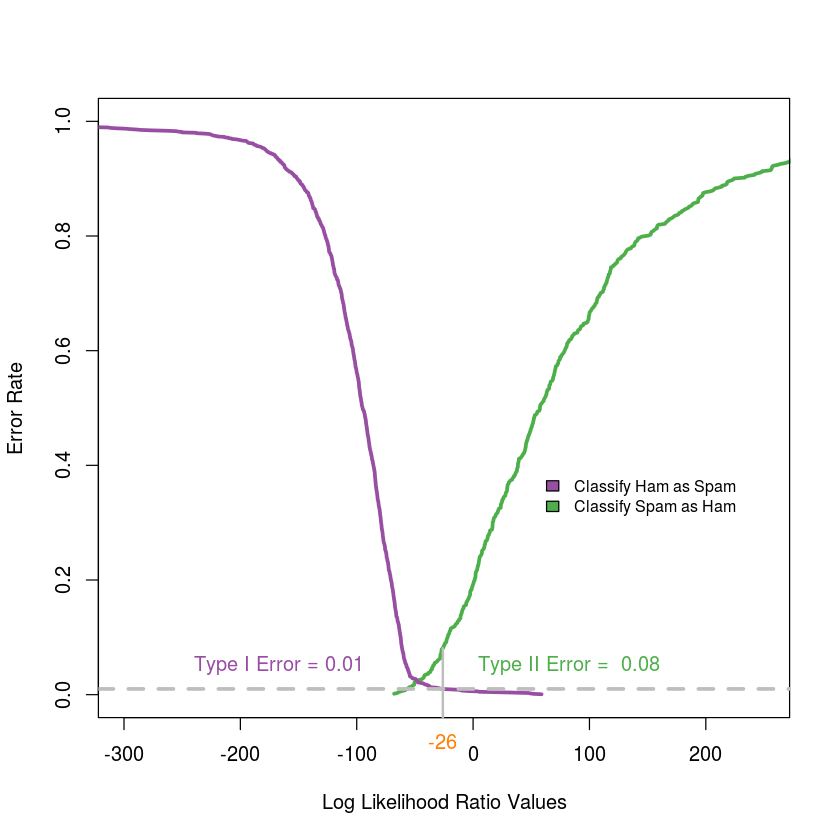

In [48]:
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(xII$error ~ xII$values,  type = "l", col = cols[1], lwd = 3,
     xlim = c(-300, 250), ylim = c(0, 1),
     xlab = "Log Likelihood Ratio Values", ylab="Error Rate")
points(xI$error ~ xI$values, type = "l", col = cols[2], lwd = 3)
legend(x = 50, y = 0.4, fill = c(cols[2], cols[1]),
       legend = c("Classify Ham as Spam", 
                  "Classify Spam as Ham"), cex = 0.8,
       bty = "n")
abline(h=0.01, col ="grey", lwd = 3, lty = 2)
text(-250, 0.05, pos = 4, "Type I Error = 0.01", col = cols[2])

mtext(tau01, side = 1, line = 0.5, at = tau01, col = cols[3])
segments(x0 = tau01, y0 = -.50, x1 = tau01, y1 = t2, 
         lwd = 2, col = "grey")
text(tau01 + 20, 0.05, pos = 4,
     paste("Type II Error = ", round(t2, digits = 2)), 
     col = cols[1])

dev.off()

In [49]:
k = 5
numTrain = length(trainMsgWords)
partK = sample(numTrain)
tot = k * floor(numTrain/k)
partK = matrix(partK[1:tot], ncol = k)

testFoldOdds = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  trainTabFold = computeFreqs(trainMsgWords[-foldIdx], trainIsSpam[-foldIdx])
  testFoldOdds = c(testFoldOdds, 
               sapply(trainMsgWords[ foldIdx ], computeMsgLLR, trainTabFold))
}

testFoldSpam = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  testFoldSpam = c(testFoldSpam, trainIsSpam[foldIdx])
}

xFoldI = typeIErrorRates(testFoldOdds, testFoldSpam)
xFoldII = typeIIErrorRates(testFoldOdds, testFoldSpam)
tauFoldI = round(min(xFoldI$values[xFoldI$error <= 0.01]))
tFold2 = xFoldII$error[ xFoldII$values < tauFoldI ]

smallNums = rep((1/2)^40, 2000000)
largeNum = 10000

print(sum(smallNums), digits = 20)

print(largeNum + sum(smallNums), digits = 20)

for (i in 1:length(smallNums)) {
  largeNum = largeNum + smallNums[i]
}
print(largeNum, digits = 20)

[1] 1.8189894035458564758e-06
[1] 10000.000001818989404
[1] 10000


In [50]:
sampleSplit = lapply(sampleEmail, splitMessage)

header = sampleSplit[[1]]$header
header[1:12]

header[1] = sub("^From", "Top-From:", header[1])
header[1]

headerPieces = read.dcf(textConnection(header), all = TRUE)

headerPieces[, "Delivered-To"]


headerVec = unlist(headerPieces)
dupKeys = sapply(headerPieces, function(x) length(unlist(x)))
names(headerVec) = rep(colnames(headerPieces), dupKeys)

headerVec[ which(names(headerVec) == "Delivered-To") ]

length(headerVec)

length(unique(names(headerVec)))

[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                
 [2] "Return-Path: <exmh-workers-admin@example.com>"                               
 [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                 
 [4] "Received: from localhost (localhost [127.0.0.1])"                            
 [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"          
 [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"               
 [7] "Received: from phobos [127.0.0.1]"                                           
 [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                  
 [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"   
[10] "Received: from listman.example.com (listman.example.com [66.187.233.211]) by"
[11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"      
[12] "    <zzzz-exmh@example.com>; Thu, 22 Aug 2002 12:34:53 +0100"

[1] "Top-From: exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"

[[1]]
[1] "zzzz@localhost.netnoteinc.com"    "exmh-workers@listman.example.com"

Delivered-To                       Delivered-To 
   "zzzz@localhost.netnoteinc.com" "exmh-workers@listman.example.com"

[1] 36

[1] 26

In [57]:
processHeader = function(header)
{
    
    return(tryCatch({

       # modify the first line to create a key:value pair
  header[1] = sub("^From", "Top-From:", header[1])  
  
  headerMat = read.dcf(textConnection(header), all = TRUE)
  headerVec = unlist(headerMat)
  
  dupKeys = sapply(headerMat, function(x) length(unlist(x)))
  names(headerVec) = rep(colnames(headerMat), dupKeys)
  
  return(headerVec)}, error=function(e) NULL))
}

headerList = lapply(sampleSplit, 
                    function(msg) {
                      processHeader(msg$header)} )

contentTypes = sapply(headerList, function(header) 
                                        header["Content-Type"])
names(contentTypes) = NULL
contentTypes


[1] "text/plain; charset=us-ascii"                 
 [2] "text/plain; charset=US-ASCII"                 
 [3] "text/plain; charset=US-ASCII"                 
 [4] "text/plain; charset=\"us-ascii\""             
 [5] NA                                             
 [6] "text/plain; charset=us-ascii; format=flowed"  
 [7] "text/plain; charset=ISO-8859-1; format=flowed"
 [8] NA                                             
 [9] "text/plain; charset=US-ASCII"                 
[10] "text/plain; charset=us-ascii"                 
[11] "text/plain; charset=us-ascii"                 
[12] "text/plain; charset=us-ascii; format=flowed"  
[13] "TEXT/PLAIN; charset=US-ASCII"                 
[14] "text/plain; charset=\"Windows-1252\""         
[15] "text/plain; charset=us-ascii; format=flowed"

In [58]:
hasAttach = grep("^ *multi", tolower(contentTypes))
hasAttach

boundaries = getBoundary(contentTypes[ hasAttach ])
boundaries

boundary = boundaries[9]
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

diff(c(bStringLocs[-1], eStringLoc))

integer(0)

character(0)

integer(0)

integer(0)

integer(0)

In [59]:
processAttach = function(body, contentType){

  n = length(body)
  boundary = getBoundary(contentType)
 
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  
  if (length(eStringLoc) == 0) eStringLoc = n
  if (length(bStringLocs) <= 1) {
    attachLocs = NULL
    msgLastLine = n
    if (length(bStringLocs) == 0) bStringLocs = 0
  } else {
    attachLocs = c(bStringLocs[ -1 ],  eStringLoc)
    msgLastLine = bStringLocs[2] - 1
  }
  
  msg = body[ (bStringLocs[1] + 1) : msgLastLine] 
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      CTloc = grep("^[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      if ( length(CTloc) == 0 ) {
        MIMEType = NA
      } else {
        CTval = body[ begL + CTloc[1] ]
        CTval = gsub('"', "", CTval )
        MIMEType = sub(" *[Cc]ontent-[Tt]ype: *([^;]*);?.*", "\\1", CTval)   
      }
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachDF = NULL) )
  return(list(body = msg, 
             attachDF = data.frame(aLen = attachLens, 
                                     aType = unlist(attachTypes),
                                     stringsAsFactors = FALSE)))                                
}                       

readEmail = function(dirName) {
       # retrieve the names of files in directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

       # read all files in the directory
  lapply(fileNames, readLines, encoding = "latin1")
}

processAllEmail = function(dirName, isSpam = FALSE)
{
       # read all files in the directory
  messages = readEmail(dirName)
  fileNames = names(messages)
  n = length(messages)
  
       # split header from body
  eSplit = lapply(messages, splitMessage)
  rm(messages)

       # process header as named character vector
  headerList = lapply(eSplit, function(msg) 
                                 processHeader(msg$header))
  
       # extract content-type key
  contentTypes = sapply(headerList, function(header) 
                                       header["Content-Type"])
  
       # extract the body
  bodyList = lapply(eSplit, function(msg) msg$body)
  rm(eSplit)

       # which email have attachments
  hasAttach = grep("^ *multi", tolower(contentTypes))

       # get summary stats for attachments and the shorter body
  attList = mapply(processAttach, bodyList[hasAttach], 
                   contentTypes[hasAttach], SIMPLIFY = FALSE)
  
  bodyList[hasAttach] = lapply(attList, function(attEl) 
                                           attEl$body)
 
  attachInfo = vector("list", length = n )
  attachInfo[ hasAttach ] = lapply(attList, 
                                  function(attEl) attEl$attachDF)
 
       # prepare return structure
  emailList = mapply(function(header, body, attach, isSpam) {
                       list(isSpam = isSpam, header = header, 
                            body = body, attach = attach)
                     },
                     headerList, bodyList, attachInfo, 
                     rep(isSpam, n), SIMPLIFY = FALSE )
  names(emailList) = fileNames
  
  invisible(emailList)
}

In [60]:
emailStruct = mapply(processAllEmail, fullDirNames,
                     isSpam = rep( c(FALSE, TRUE), 3:2))      


In [61]:
emailStruct = unlist(emailStruct, recursive = FALSE)


In [62]:
sampleStruct = emailStruct[ indx ]


In [63]:
save(emailStruct, file="emailXX.rda")

In [64]:
header = sampleStruct[[1]]$header
subject = header["Subject"]
els = strsplit(subject, "")
all(els %in% LETTERS)

[1] FALSE

In [65]:
testSubject = c("DEAR MADAME", "WINNER!", "")


In [66]:
els = strsplit(testSubject, "")
sapply(els, function(subject) all(subject %in% LETTERS))


gsub("[[:punct:] ]", "", testSubject)

gsub("[^[:alpha:]]", "", testSubject)


[1] FALSE FALSE  TRUE

[1] "DEARMADAME" "WINNER"     ""

[1] "DEARMADAME" "WINNER"     ""

In [67]:
isYelling = function(msg) {
  if ( "Subject" %in% names(msg$header) ) {
     el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
     if (nchar(el) > 0) 
        nchar(gsub("[A-Z]", "", el)) < 1
     else 
        FALSE
  } else 
    NA
}

perCaps =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters
  body = gsub("[^[:alpha:]]", "", body)
  capText = gsub("[^A-Z]", "", body)
  100 * nchar(capText)/nchar(body)
}

sapply(sampleStruct, perCaps)

/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham1 
                                                                                                                   4.451039 
  /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham2 
                                                                                                                   7.491289 
  /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham3 
                                                                                                                   7.436096 
  /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham4 
                                                                                                                   5.090909 
  /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham5 
                                                                                                                   2.617230 
 /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham15 
                                                                                                                   8.333333 
 /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham27 
                                                                                                                   5.707196 
 /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham68 
                                                                                                                   6.172840 
 /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham69 
                                                                                                                   5.728587 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham329 
                                                                                                                   2.653400 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham404 
                                                                                                                   5.274972 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham427 
                                                                                                                   3.759398 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham516 
                                                                                                                   3.978159 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham852 
                                                                                                                   5.007587 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham971 
                                                                                                                   3.253589

In [68]:
funcList = list( 
 isRe = function(msg) {
       "Subject" %in% names(msg$header) &&
         length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
  },
  numLines = function(msg) 
                length(msg$body),
  isYelling = function(msg) {
    if ( "Subject" %in% names(msg$header) ) {
       el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
       if (nchar(el) > 0) 
         nchar(gsub("[A-Z]", "", el)) < 1
       else 
         FALSE
    }
    else NA
  },
  perCaps = function(msg) {
    body = paste(msg$body, collapse = "")

         # Return NA if the body of the message is "empty"
    if(length(body) == 0 || nchar(body) == 0) return(NA)

         # Eliminate non-alpha characters
    body = gsub("[^[:alpha:]]", "", body)
    capText = gsub("[^A-Z]", "", body)
    100 * nchar(capText)/nchar(body)
  }
)

In [69]:
lapply(funcList, function(func) 
                   sapply(sampleStruct, function(msg) func(msg)))

$isRe
  /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham1 
                                                                                                                       TRUE 
  /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham2 
                                                                                                                      FALSE 
  /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham3 
                                                                                                                      FALSE 
  /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham4 
                                                                                                                      FALSE 
  /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham5 
                                                                                                                       TRUE 
 /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham15 
                                                                                                                      FALSE 
 /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham27 
                                                                                                                       TRUE 
 /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham68 
                                                                                                                      FALSE 
 /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham69 
                                                                                                                       TRUE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham329 
                                                                                                                       TRUE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham404 
                                                                                                                       TRUE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham427 
                                                                                                                       TRUE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham516 
                                                                                                                      FALSE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham852 
                                                                                                                       TRUE 
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham971 
                                                                                                                       TRUE 

$numLines
  /home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham1 
                                                                                                            

In [70]:
createDerivedDF =
function(email = emailStruct, operations = funcList, 
         verbose = FALSE)
{
  els = lapply(names(operations),
               function(id) {
                 if(verbose) print(id)
                 e = operations[[id]]
                 v = if(is.function(e)) 
                        sapply(email, e)
                      else 
                        sapply(email, function(msg) eval(e))
                 v
         })

   df = as.data.frame(els)
   names(df) = names(operations)
   invisible(df)
}

In [71]:
sampleDF = createDerivedDF(sampleStruct)
head(sampleDF)


,isRe,numLines,isYelling,perCaps
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham1,TRUE,50,FALSE,4.451039
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham2,FALSE,26,FALSE,7.491289
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham3,FALSE,38,FALSE,7.436096
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham4,FALSE,32,FALSE,5.090909
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham5,TRUE,40,FALSE,2.617230
/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/Data/20021010_easy_ham/easy_ham15,FALSE,17,FALSE,8.333333


In [72]:
funcList = list(
  isSpam =
    expression(msg$isSpam)
  ,
  isRe =
    function(msg) {
      # Can have a Fwd: Re:  ... but we are not looking for this here.
      # We may want to look at In-Reply-To field.
      "Subject" %in% names(msg$header) && 
        length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
    }
  ,
  numLines =
    function(msg) length(msg$body)
  ,
  bodyCharCt =
    function(msg)
      sum(nchar(msg$body))
  ,
  underscore =
    function(msg) {
      if(!"Reply-To" %in% names(msg$header))
        return(FALSE)
      
      txt <- msg$header[["Reply-To"]]
      length(grep("_", txt)) > 0  && 
        length(grep("[0-9A-Za-z]+", txt)) > 0
    }
  ,
  subExcCt = 
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^!]","", x)))
    }
  ,
  subQuesCt =
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^?]","", x)))
    }
  ,
  numAtt = 
    function(msg) {
      if (is.null(msg$attach)) return(0)
      else nrow(msg$attach)
    }
   
  ,
  priority =
    function(msg) {
      ans <- FALSE
      # Look for names X-Priority, Priority, X-Msmail-Priority
      # Look for high any where in the value
      ind = grep("priority", tolower(names(msg$header)))
      if (length(ind) > 0)  {
        ans <- length(grep("high", tolower(msg$header[ind]))) >0
      }
      ans
    }
  ,
  numRec =
    function(msg) {
      # unique or not.
      els = getMessageRecipients(msg$header)
      
      if(length(els) == 0)
        return(NA)
      
      # Split each line by ","  and in each of these elements, look for
      # the @ sign. This handles
      tmp = sapply(strsplit(els, ","), function(x) grep("@", x))
      sum(sapply(tmp, length))
    }
  ,
  perCaps =
    function(msg)
    {
      body = paste(msg$body, collapse = "")
      
      # Return NA if the body of the message is "empty"
      if(length(body) == 0 || nchar(body) == 0) return(NA)
      
      # Eliminate non-alpha characters and empty lines 
      body = gsub("[^[:alpha:]]", "", body)
      els = unlist(strsplit(body, ""))
      ctCap = sum(els %in% LETTERS)
      100 * ctCap / length(els)
    }
  ,
  isInReplyTo =
    function(msg)
    {
      "In-Reply-To" %in% names(msg$header)
    }
  ,
  sortedRec =
    function(msg)
    {
      ids = getMessageRecipients(msg$header)
      all(sort(ids) == ids)
    }
  ,
  subPunc =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        el = gsub("['/.:@-]", "", msg$header["Subject"])
        length(grep("[A-Za-z][[:punct:]]+[A-Za-z]", el)) > 0
      }
      else
        FALSE
    },
  hour =
    function(msg)
    {
      date = msg$header["Date"]
      if ( is.null(date) ) return(NA)
      # Need to handle that there may be only one digit in the hour
      locate = regexpr("[0-2]?[0-9]:[0-5][0-9]:[0-5][0-9]", date)
      
      if (locate < 0)
        locate = regexpr("[0-2]?[0-9]:[0-5][0-9]", date)
      if (locate < 0) return(NA)
      
      hour = substring(date, locate, locate+1)
      hour = as.numeric(gsub(":", "", hour))
      
      locate = regexpr("PM", date)
      if (locate > 0) hour = hour + 12
      
      locate = regexpr("[+-][0-2][0-9]00", date)
      if (locate < 0) offset = 0
      else offset = as.numeric(substring(date, locate, locate + 2))
      (hour - offset) %% 24
    }
  ,
  multipartText =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      numAtt = nrow(msg$attach)
      
      types = 
        length(grep("(html|plain|text)", msg$attach$aType)) > (numAtt/2)
    }
  ,
  hasImages =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("^ *image", tolower(msg$attach$aType))) > 0
    }
  ,
  isPGPsigned =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("pgp", tolower(msg$attach$aType))) > 0
    },
  perHTML =
    function(msg)
    {
      if(! ("Content-Type" %in% names(msg$header))) return(0)
      
      el = tolower(msg$header["Content-Type"]) 
      if (length(grep("html", el)) == 0) return(0)
      
      els = gsub("[[:space:]]", "", msg$body)
      totchar = sum(nchar(els))
      totplain = sum(nchar(gsub("<[^<]+>", "", els )))
      100 * (totchar - totplain)/totchar
    },
  subSpamWords =
    function(msg)
    {
      if("Subject" %in% names(msg$header))
        length(grep(paste(SpamCheckWords, collapse = "|"), 
                    tolower(msg$header["Subject"]))) > 0
      else
        NA
    }
  ,
  subBlanks =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        x = msg$header["Subject"]
        # should we count blank subject line as 0 or 1 or NA?
        if (nchar(x) == 1) return(0)
        else 100 *(1 - (nchar(gsub("[[:blank:]]", "", x))/nchar(x)))
      } else NA
    }
  ,
  noHost =
    function(msg)
    {
      # Or use partial matching.
      idx = pmatch("Message-", names(msg$header))
      
      if(is.na(idx)) return(NA)
      
      tmp = msg$header[idx]
      return(length(grep(".*@[^[:space:]]+", tmp)) ==  0)
    }
  ,
  numEnd =
    function(msg)
    {
      # If we just do a grep("[0-9]@",  )
      # we get matches on messages that have a From something like
      # " \"marty66@aol.com\" <synjan@ecis.com>"
      # and the marty66 is the "user's name" not the login
      # So we can be more precise if we want.
      x = names(msg$header)
      if ( !( "From" %in% x) ) return(NA)
      login = gsub("^.*<", "", msg$header["From"])
      if ( is.null(login) ) 
        login = gsub("^.*<", "", msg$header["X-From"])
      if ( is.null(login) ) return(NA)
      login = strsplit(login, "@")[[1]][1]
      length(grep("[0-9]+$", login)) > 0
    },
  isYelling =
    function(msg)
    {
      if ( "Subject" %in% names(msg$header) ) {
        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
        if (nchar(el) > 0) nchar(gsub("[A-Z]", "", el)) < 1
        else FALSE
      }
      else
        NA
    },
  forwards =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      ans = length(grep("^[[:space:]]*>", x))
      100 * ans / length(x)
    },
  isOrigMsg =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[^[:alpha:]]*original[^[:alpha:]]+message[^[:alpha:]]*$", 
                  tolower(x) ) ) > 0
    },
  isDear =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[[:blank:]]*dear +(sir|madam)\\>", 
                  tolower(x))) > 0
    },
  isWrote =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("(wrote|schrieb|ecrit|escribe):", tolower(x) )) > 0
    },
  avgWordLen =
    function(msg)
    {
      txt = paste(msg$body, collapse = " ")
      if(length(txt) == 0 || sum(nchar(txt)) == 0) return(0)
      
      txt = gsub("[^[:alpha:]]", " ", txt)
      words = unlist(strsplit(txt, "[[:blank:]]+"))
      wordLens = nchar(words)
      mean(wordLens[ wordLens > 0 ])
    }
  ,
  numDlr =
    function(msg)
    {
      x = paste(msg$body, collapse = "")
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      nchar(gsub("[^$]","", x))
    }
)

In [73]:
SpamCheckWords =
  c("viagra", "pounds", "free", "weight", "guarantee", "million", 
    "dollars", "credit", "risk", "prescription", "generic", "drug",
    "financial", "save", "dollar", "erotic", "million", "barrister",
    "beneficiary", "easy", 
    "money back", "money", "credit card")


getMessageRecipients =
  function(header)
  {
    c(if("To" %in% names(header))  header[["To"]] else character(0),
      if("Cc" %in% names(header))  header[["Cc"]] else character(0),
      if("Bcc" %in% names(header)) header[["Bcc"]] else character(0)
    )
  }

In [75]:
emailDF = createDerivedDF(emailStruct)
dim(emailDF)
save(emailDF, file = "spamAssassinDerivedDF.rda")



[1] 6099   30

In [76]:
load("/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy3/spamAssassinDerivedDF.rda")
dim(emailDF)

[1] 6099   30

In [77]:
perCaps2 =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters and empty lines 
  body = gsub("[^[:alpha:]]", "", body)
  els = unlist(strsplit(body, ""))
  ctCap = sum(els %in% LETTERS)
  100 * ctCap / length(els)
}

pC = sapply(emailStruct, perCaps)
pC2 = sapply(emailStruct, perCaps2)
identical(pC, pC2)

[1] TRUE

In [78]:
indNA = which(is.na(emailDF$subExcCt))

indNoSubject = which(sapply(emailStruct, 
                            function(msg) 
                              !("Subject" %in% names(msg$header))))

all(indNA == indNoSubject)

all(emailDF$bodyCharCt > emailDF$numLines)

Warning message in indNA == indNoSubject:
“longer object length is not a multiple of shorter object length”

[1] FALSE

[1] FALSE

In [79]:
x.at = c(1,10,100,1000,10000,100000)
y.at = c(1, 5, 10, 50, 100, 500, 5000)
nL = 1 + emailDF$numLines
nC = 1 + emailDF$bodyCharCt
pdf("ScatterPlotNumLinesNumChars.pdf", width = 6, height = 4.5)
plot(nL ~ nC, log = "xy", pch=".", xlim=c(1,100000), axes = FALSE,
     xlab = "Number of Characters", ylab = "Number of Lines")
box() 
axis(1, at = x.at, labels = formatC(x.at, digits = 0, format="d"))
axis(2, at = y.at, labels = formatC(y.at, digits = 0, format="d")) 
abline(a=0, b=1, col="red", lwd = 2)
dev.off()

pdf("SPAM_boxplotsPercentCaps.pdf", width = 5, height = 5)

png 
  2

pdf 
  3

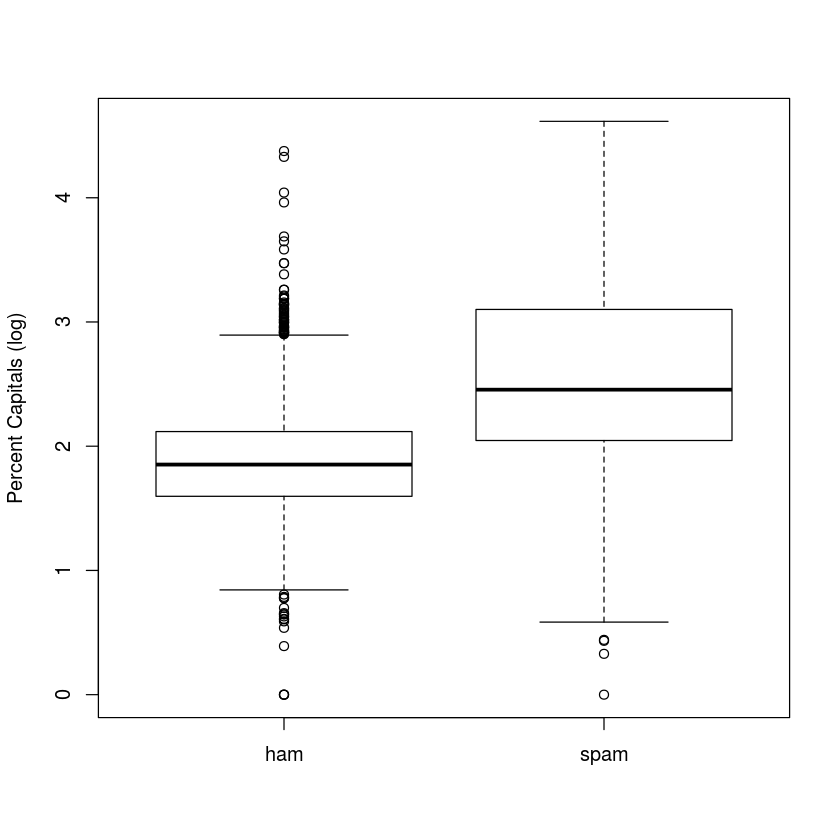

In [80]:
percent = emailDF$perCaps
isSpamLabs = factor(emailDF$isSpam, labels = c("ham", "spam"))
boxplot(log(1 + percent) ~ isSpamLabs,
        ylab = "Percent Capitals (log)")

dev.off()

logPerCapsSpam = log(1 + emailDF$perCaps[ emailDF$isSpam ])
logPerCapsHam = log(1 + emailDF$perCaps[ !emailDF$isSpam ])

qqplot(logPerCapsSpam, logPerCapsHam, 
       xlab = "Regular Email", ylab = "Spam Email", 
       main = "Percentage of Capital Letters (log scale)",
       pch = 19, cex = 0.3)

pdf 
  3

   isSpamLabs
     ham spam
  0 4010 1713
  1  183  177
  2    7    5
  4    0    1
  5    1    2

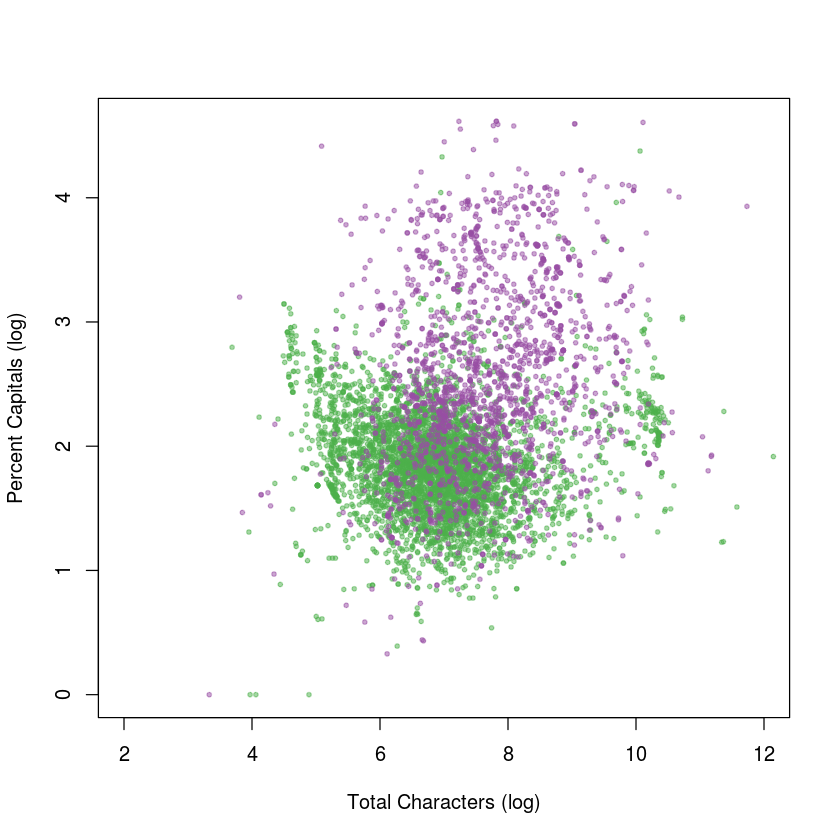

In [81]:
colI = c("#4DAF4A80", "#984EA380")
logBodyCharCt = log(1 + emailDF$bodyCharCt)
logPerCaps = log(1 + emailDF$perCaps)
plot(logPerCaps ~ logBodyCharCt, xlab = "Total Characters (log)",
     ylab = "Percent Capitals (log)",
     col = colI[1 + emailDF$isSpam],
     xlim = c(2,12), pch = 19, cex = 0.5)

dev.off()

table(emailDF$numAtt, isSpamLabs)

pdf 
  3

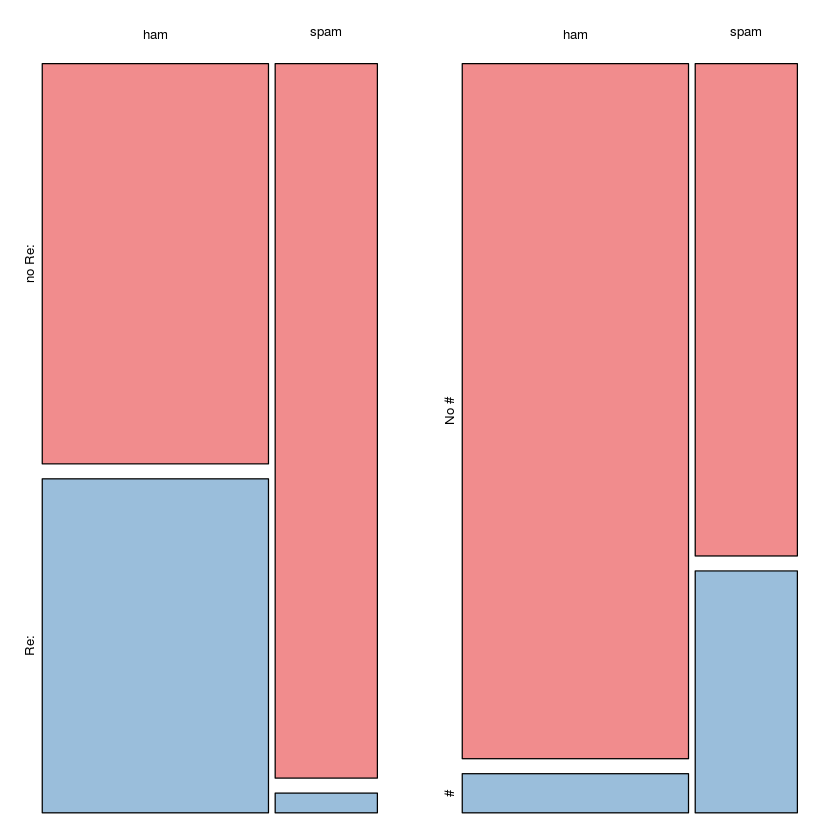

In [82]:
oldPar = par(mfrow = c(1, 2), mar = c(1,1,1,1))

colM = c("#E41A1C80", "#377EB880")
isRe = factor(emailDF$isRe, labels = c("no Re:", "Re:"))
mosaicplot(table(isSpamLabs, isRe), main = "",
           xlab = "", ylab = "", color = colM)

fromNE = factor(emailDF$numEnd, labels = c("No #", "#"))
mosaicplot(table(isSpamLabs, fromNE), color = colM,
           main = "", xlab="", ylab = "")

par(oldPar)

dev.off()

In [83]:
library(rpart)

setupRpart = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.factor(x)
                      levels(x) = c("F", "T")
                      x
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFrp = setupRpart(emailDF)

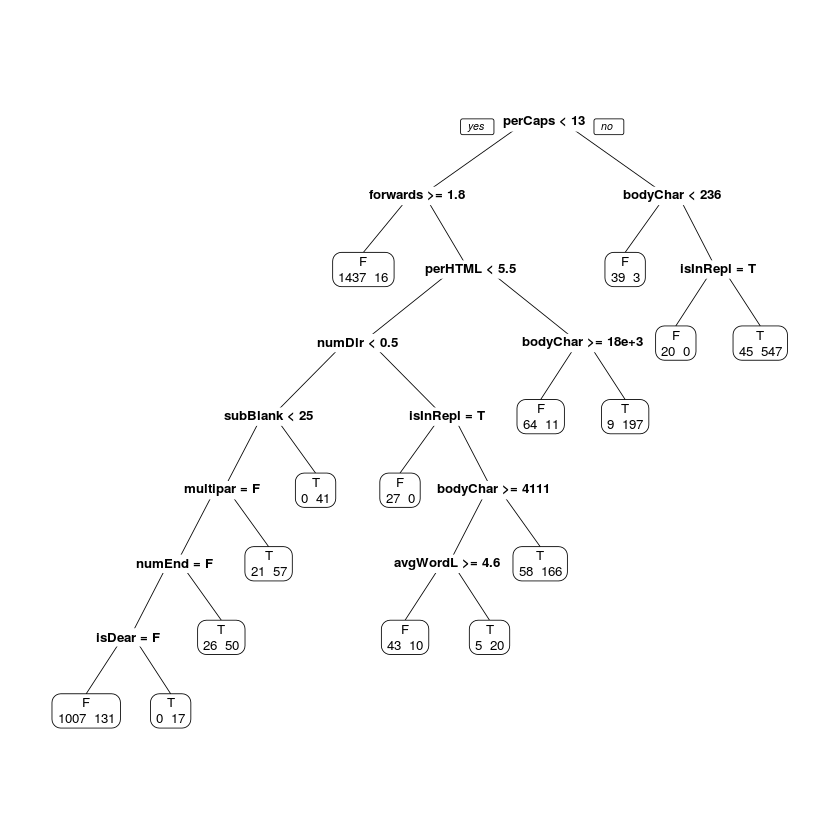

In [87]:
set.seed(418910)
testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testDF = 
  rbind( emailDFrp[ emailDFrp$isSpam == "T", ][testSpamIdx, ],
         emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
trainDF =
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
         emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class")

library(rpart.plot)
prp(rpartFit, extra = 1)

# library(rpart.plot)

pdf 
  3

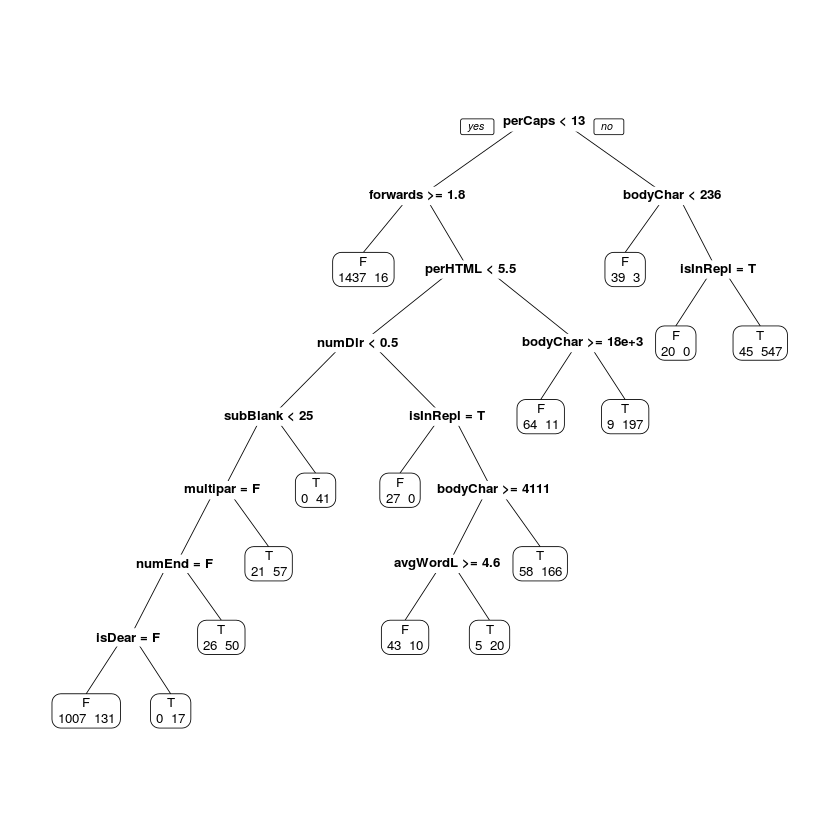

In [88]:
prp(rpartFit, extra = 1)
dev.off()


In [89]:
predictions = predict(rpartFit, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")
 
predsForHam = predictions[ testDF$isSpam == "F" ]
summary(predsForHam)

sum(predsForHam == "T") / length(predsForHam)

predsForSpam = predictions[ testDF$isSpam == "T" ]
sum(predsForSpam == "F") / length(predsForSpam)

complexityVals = c(seq(0.00001, 0.0001, length=19),
                   seq(0.0001, 0.001, length=19), 
                   seq(0.001, 0.005, length=9),
                   seq(0.005, 0.01, length=9))

fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })

F    T 
1301   99

[1] 0.07071429

[1] 0.1629747

pdf 
  3

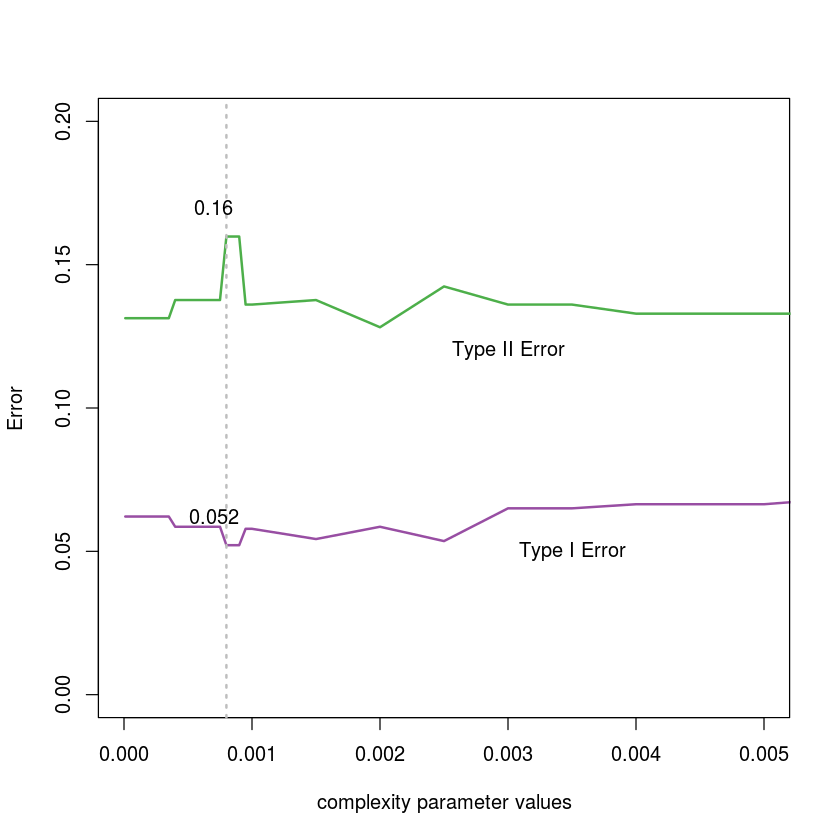

In [90]:
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,0.005), 
     ylab="Error", xlab="complexity parameter values")
points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

dev.off()

# Start Actual Cast Study 3

In [92]:
# What features do we have?
colnames(testDF)

[1] "isSpam"        "isRe"          "underscore"    "priority"     
 [5] "isInReplyTo"   "sortedRec"     "subPunc"       "multipartText"
 [9] "hasImages"     "isPGPsigned"   "subSpamWords"  "noHost"       
[13] "numEnd"        "isYelling"     "isOrigMsg"     "isDear"       
[17] "isWrote"       "numLines"      "bodyCharCt"    "subExcCt"     
[21] "subQuesCt"     "numAtt"        "numRec"        "perCaps"      
[25] "hour"          "perHTML"       "subBlanks"     "forwards"     
[29] "avgWordLen"    "numDlr"

# Question 20

## Part A

In [93]:
# This was also in the provided code online, a decent place to start.
k = 5
numTrain = length(trainMsgWords)
partK = sample(numTrain)
tot = k * floor(numTrain/k)
partK = matrix(partK[1:tot], ncol = k)

testFoldOdds = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  trainTabFold = computeFreqs(trainMsgWords[-foldIdx], trainIsSpam[-foldIdx])
  testFoldOdds = c(testFoldOdds, 
               sapply(trainMsgWords[ foldIdx ], computeMsgLLR, trainTabFold))
}

testFoldSpam = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  testFoldSpam = c(testFoldSpam, trainIsSpam[foldIdx])
}

xFoldI = typeIErrorRates(testFoldOdds, testFoldSpam)
xFoldII = typeIIErrorRates(testFoldOdds, testFoldSpam)
tauFoldI = round(min(xFoldI$values[xFoldI$error <= 0.01]))
tFold2 = xFoldII$error[ xFoldII$values < tauFoldI ]

In [102]:
tFold2

[1] 0.0007905138 0.0015810277 0.0023715415 0.0031620553 0.0039525692
  [6] 0.0047430830 0.0055335968 0.0063241107 0.0071146245 0.0079051383
 [11] 0.0086956522 0.0094861660 0.0102766798 0.0110671937 0.0118577075
 [16] 0.0126482213 0.0134387352 0.0142292490 0.0150197628 0.0158102767
 [21] 0.0166007905 0.0173913043 0.0181818182 0.0189723320 0.0197628458
 [26] 0.0205533597 0.0213438735 0.0221343874 0.0229249012 0.0237154150
 [31] 0.0245059289 0.0252964427 0.0260869565 0.0268774704 0.0276679842
 [36] 0.0284584980 0.0292490119 0.0300395257 0.0308300395 0.0316205534
 [41] 0.0324110672 0.0332015810 0.0339920949 0.0347826087 0.0355731225
 [46] 0.0363636364 0.0371541502 0.0379446640 0.0387351779 0.0395256917
 [51] 0.0403162055 0.0411067194 0.0418972332 0.0426877470 0.0434782609
 [56] 0.0442687747 0.0450592885 0.0458498024 0.0466403162 0.0474308300
 [61] 0.0482213439 0.0490118577 0.0498023715 0.0505928854 0.0513833992
 [66] 0.0521739130 0.0529644269 0.0537549407 0.0545454545 0.0553359684
 [71] 0.0561264822 0.0569169960 0.0577075099 0.0584980237 0.0592885375
 [76] 0.0600790514 0.0608695652 0.0616600791 0.0624505929 0.0632411067
 [81] 0.0640316206 0.0648221344 0.0656126482 0.0664031621 0.0671936759
 [86] 0.0679841897 0.0687747036 0.0695652174 0.0703557312 0.0711462451
 [91] 0.0719367589 0.0727272727 0.0735177866 0.0743083004 0.0750988142
 [96] 0.0758893281 0.0766798419 0.0774703557 0.0782608696 0.0790513834
[101] 0.0798418972 0.0806324111 0.0814229249 0.0822134387 0.0830039526
[106] 0.0837944664 0.0845849802 0.0853754941 0.0861660079 0.0869565217
[111] 0.0877470356 0.0885375494 0.0893280632 0.0901185771 0.0909090909
[116] 0.0916996047 0.0924901186 0.0932806324 0.0940711462 0.0948616601